In [1]:
import sys
import os
import pandas as pd
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))

In [11]:
from utils import DataModularization


In [6]:
df=pd.read_csv('../data/cleanedDataset.csv')
df.head()

C:\Users\asmam\AppData\Local\Temp\ipykernel_18588\1841292.py:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/cleanedDataset.csv')


,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,...,CrossBorder,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
0,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
1,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
2,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
3,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
4,120087,10173,1619,54057250.0,2004,4.0,1870.0,75.0,5.0,52700.0,...,Unknown,Monthly,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant


In [7]:
data=df.copy()
data.shape

(882934, 51)

#### Data Summarization:
##### Descriptive Statistics
For numerical features like TotalPremium, TotalClaims, and others, we’ll calculate key statistics such as:

Mean: Average of the values.
Median: Middle value.
Variance: Measure of variability or spread.
Standard Deviation: How much the data deviates from the mean.
Range: Difference between the maximum and minimum values.

In [8]:

numerical_columns = ['TotalPremium', 'TotalClaims']
data[numerical_columns].describe()


,TotalPremium,TotalClaims
count,882934.000000,882934.000000
mean,51.595875,4.213254
std,127.625314,138.693609
min,-350.701491,-5690.719298
25%,0.000000,0.000000
50%,2.180175,0.000000
75%,21.929825,0.000000
max,752.741491,7157.771930


#### Univariate Analysis

We will plot histograms for numerical columns like TotalPremium, TotalClaims, and bar charts for categorical columns such as CoverType, VehicleType, etc.

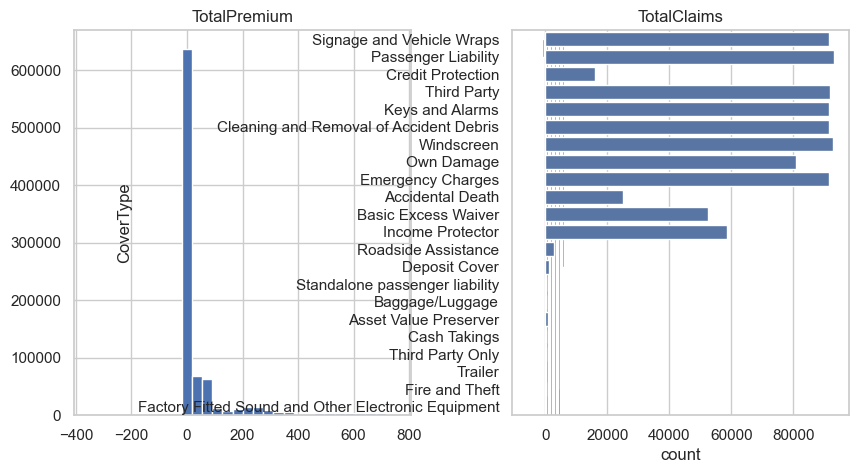

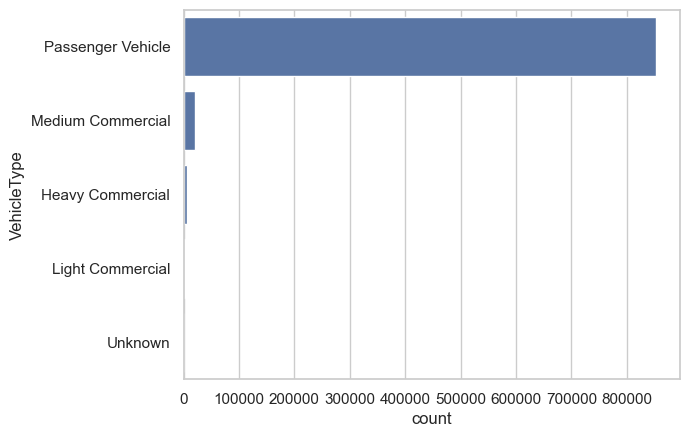

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for numerical variables
data[numerical_columns].hist(bins=30, figsize=(10, 5))

# Bar chart for categorical columns
categorical_columns = ['CoverType', 'VehicleType']
for col in categorical_columns:
    sns.countplot(y=col, data=data)
    plt.show()


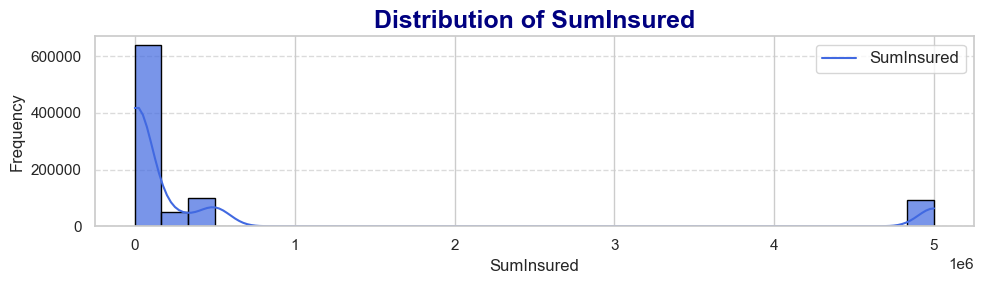

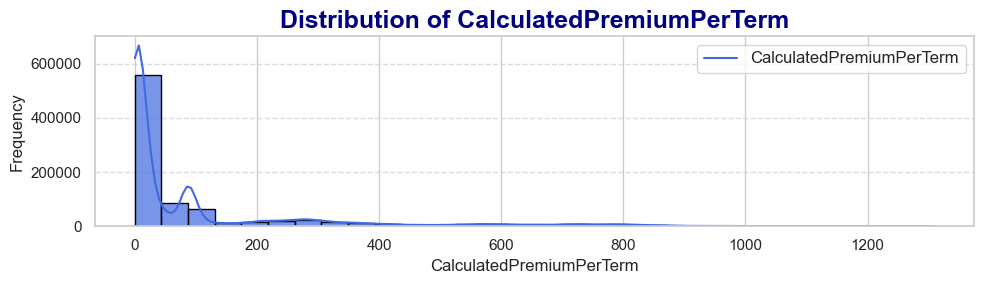

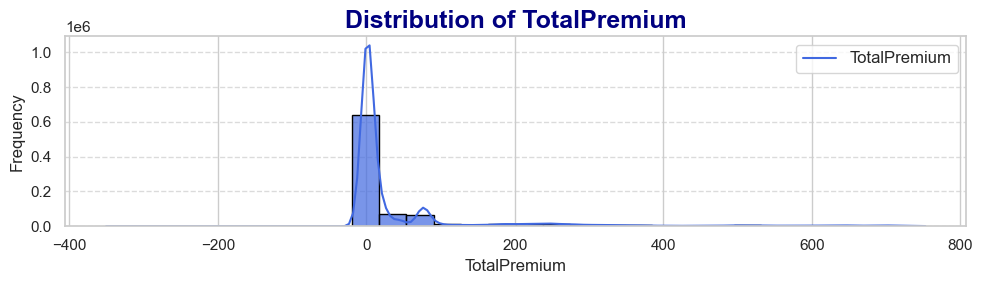

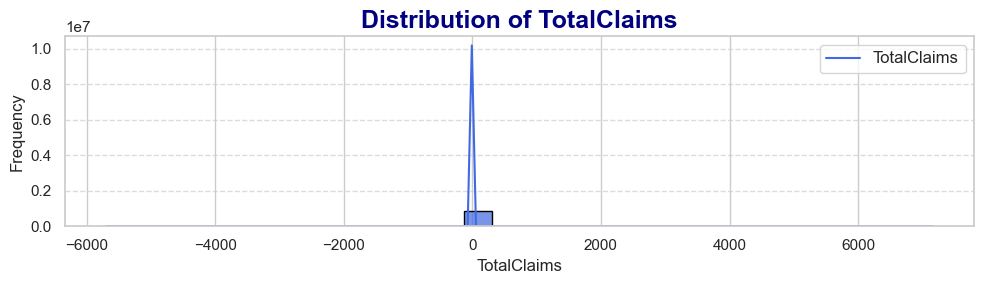

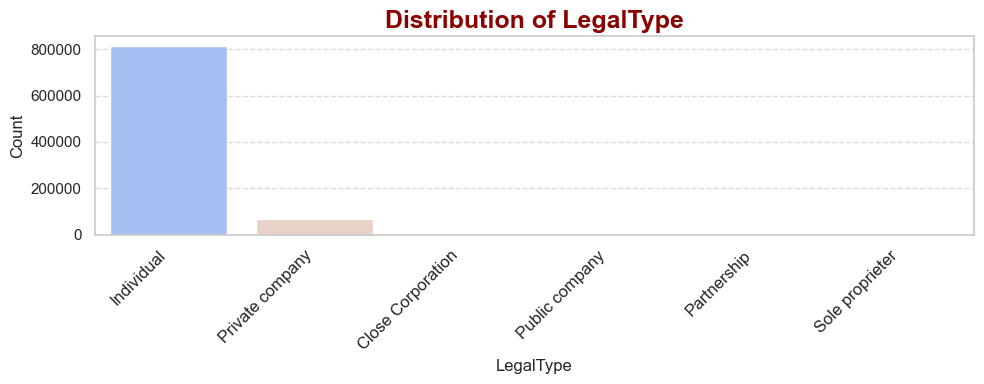

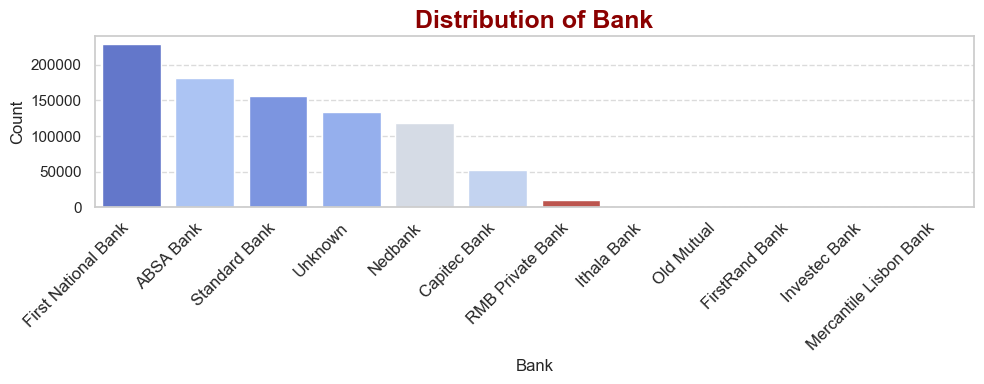

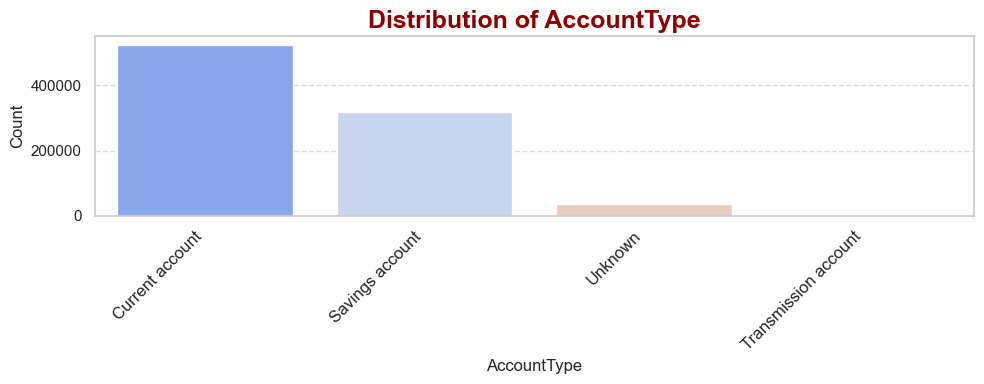

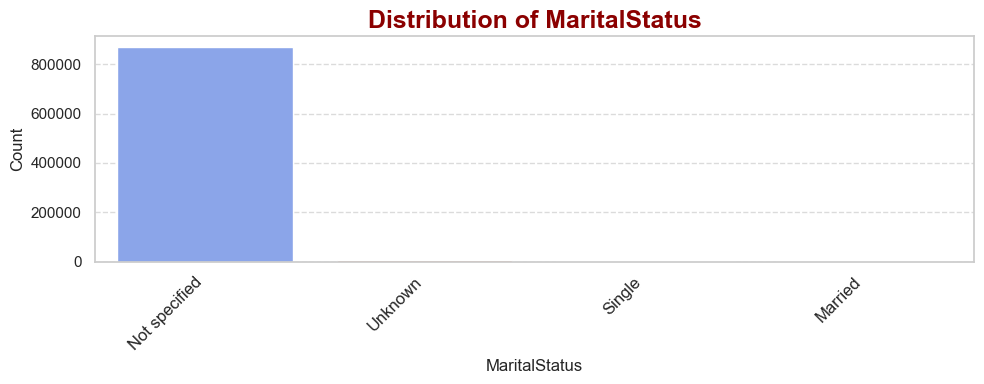

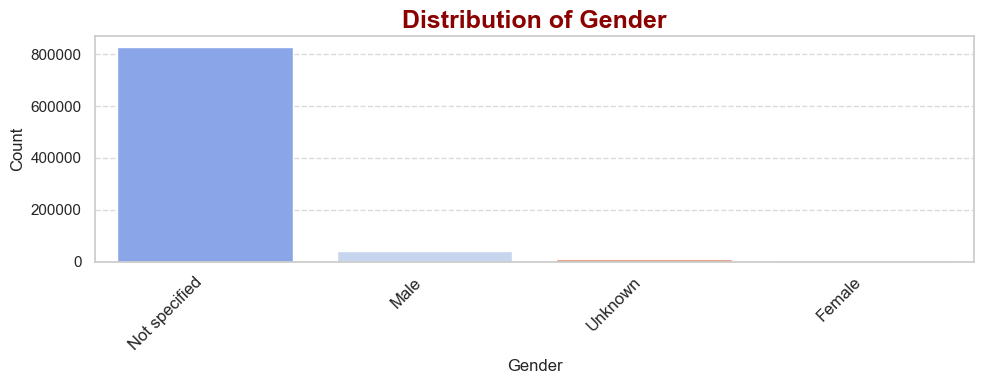

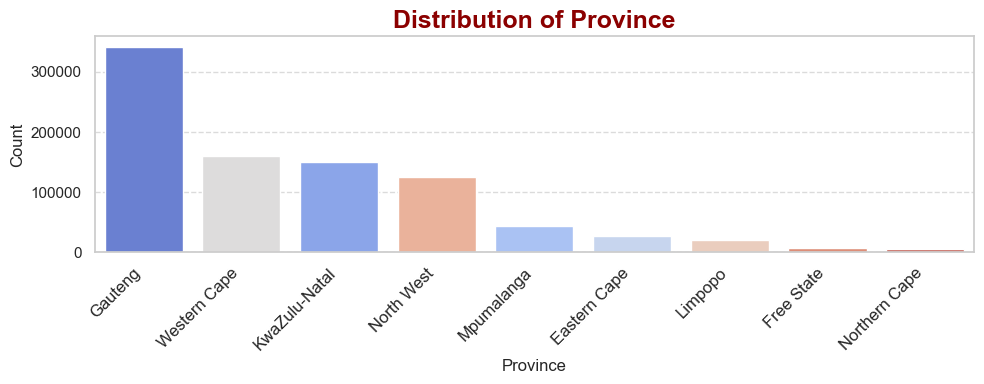

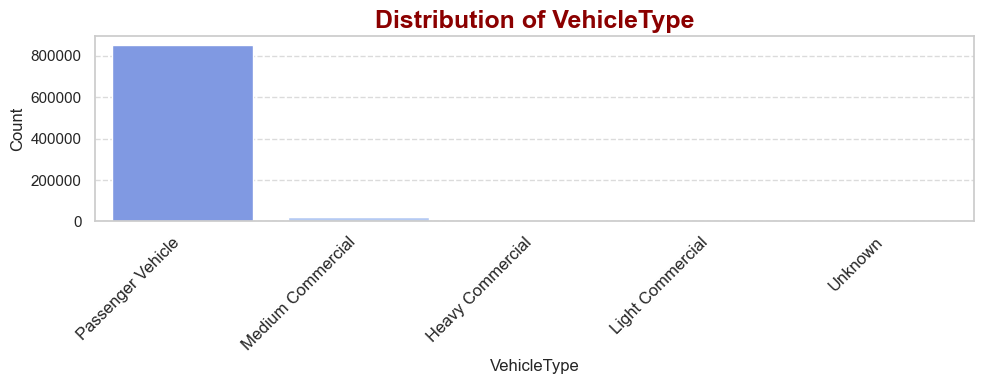

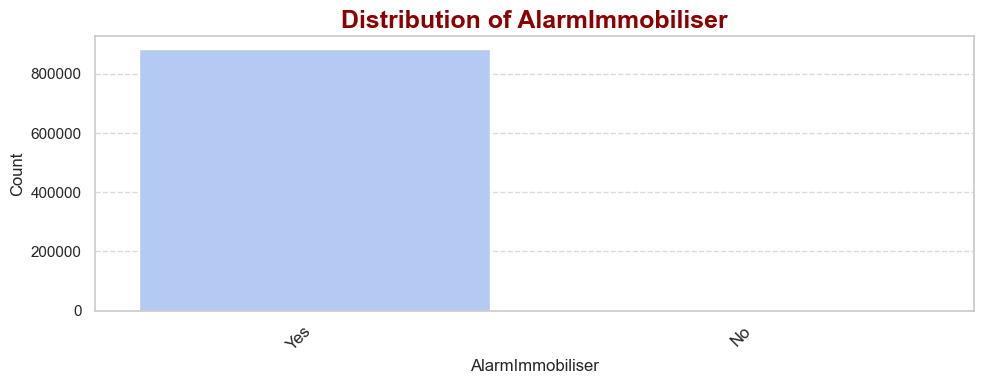

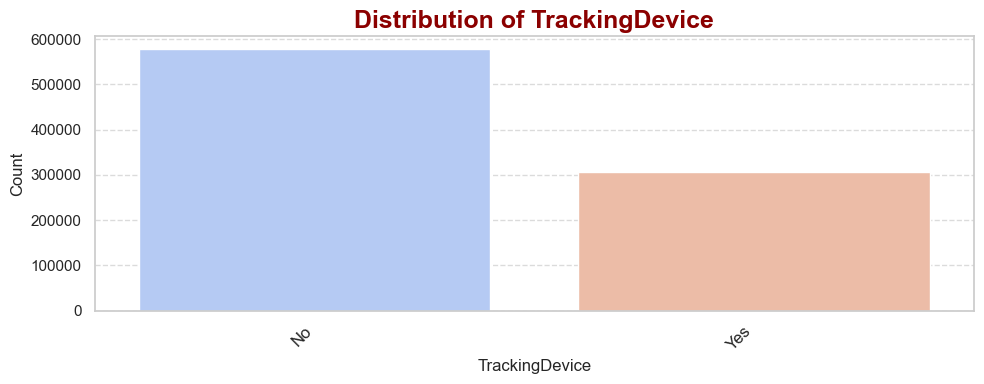

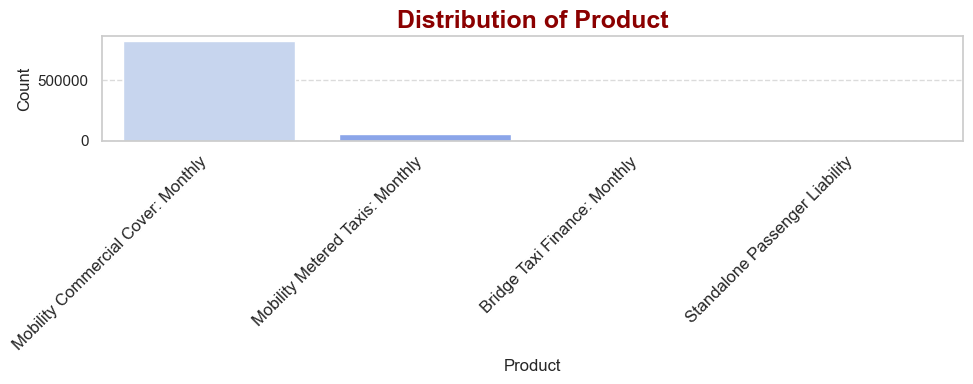

In [12]:
# Import visualizer
# from data_visualization import DataVisualizer
# # Create instance of the class
# vis = DataVisualizer(data)
univariate_analysis = DataModularization(data)

# Define numerical columns
numerical_cols = [
    'SumInsured', 'CalculatedPremiumPerTerm', 
    'TotalPremium', 'TotalClaims'
]
# Define categorical columns
categorical_cols = [
    'LegalType', 'Bank', 'AccountType', 'MaritalStatus', 
    'Gender', 'Province', 'VehicleType', 
    'AlarmImmobiliser', 'TrackingDevice', 
    'Product'
]

# Plot the plot of both numerical and categorical columns
univariate_analysis.univariate_analysis(numerical_cols, categorical_cols)

#### Bivariate
To explore relationships between TotalPremium and TotalClaims as a function of PostalCode or other geographic variables, we can use scatter plots and calculate the correlation between features.

d:\Kifya\Week_03\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


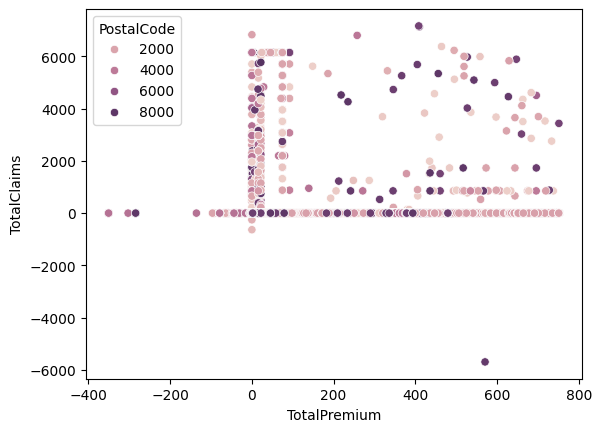

In [6]:
# Correlation Matrix
correlation_matrix = data[['TotalPremium', 'TotalClaims', 'PostalCode']].corr()

# Scatter Plot
sns.scatterplot(data=data, x='TotalPremium', y='TotalClaims', hue='PostalCode')
plt.show()


In [7]:
# Group by month and PostalCode
monthly_data = data.groupby(['TransactionMonth', 'PostalCode'])[['TotalPremium', 'TotalClaims']].sum().reset_index()


In [8]:
# Calculate monthly change for TotalPremium and TotalClaims
monthly_data['TotalPremium_change'] = monthly_data.groupby('PostalCode')['TotalPremium'].diff()
monthly_data['TotalClaims_change'] = monthly_data.groupby('PostalCode')['TotalClaims'].diff()


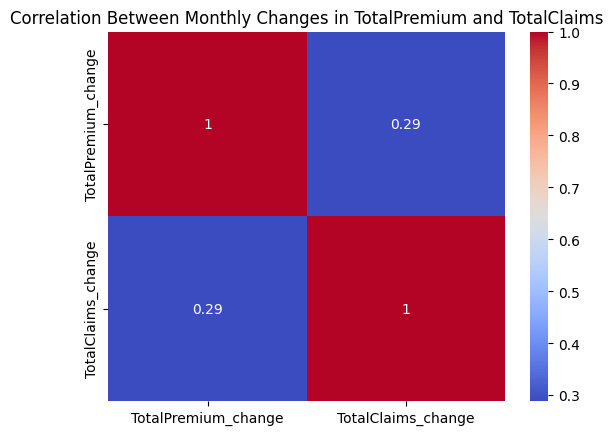

In [9]:
# Calculate correlation matrix for monthly changes
correlation_matrix = monthly_data[['TotalPremium_change', 'TotalClaims_change']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Monthly Changes in TotalPremium and TotalClaims')
plt.show()


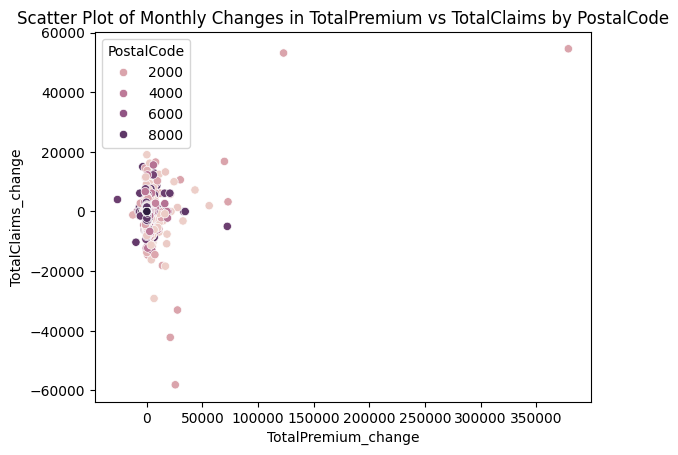

In [11]:
# Scatter plot for relationship between changes in TotalPremium and TotalClaims
sns.scatterplot(data=monthly_data, x='TotalPremium_change', y='TotalClaims_change', hue='PostalCode')
plt.title('Scatter Plot of Monthly Changes in TotalPremium vs TotalClaims by PostalCode')
plt.show()


#### Data Comparison
We’ll analyze the changes in insurance cover type, premium, and auto make by geography (e.g., by Country, Province).

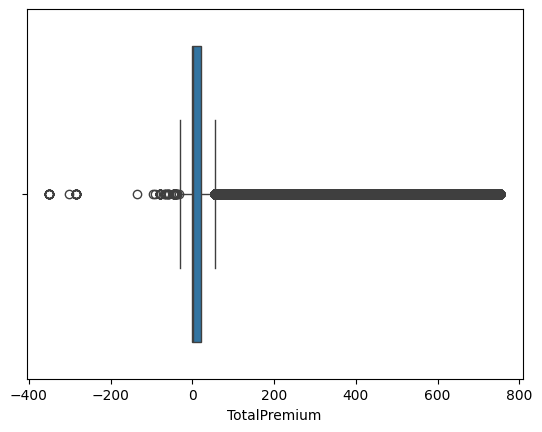

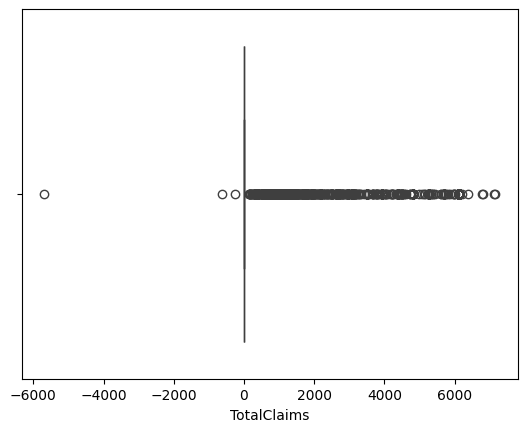

In [10]:
# Box plot for numerical variables
sns.boxplot(x='TotalPremium', data=data)
plt.show()

sns.boxplot(x='TotalClaims', data=data)
plt.show()


### Visualization
Finally, we’ll create three insightful and aesthetically pleasing plots based on the key insights from the EDA. For example:

Geographic Premium Distribution: A map plot showing the variation in premium values across different regions.
Correlation Heatmap: A heatmap showing correlations between different numerical variables.
Scatter Plot: A scatter plot showing the relationship between TotalPremium and TotalClaims by vehicle type or cover type.